In [15]:
from __future__ import division, print_function

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA, FastICA, FactorAnalysis, KernelPCA
import seaborn; seaborn.set()

In [17]:
import os
import sys

In [18]:
# os.chdir('../ad_epi/')
os.getcwd()

'/Users/hmourit/Documents/0project/ad_epi'

In [19]:
betas = pd.read_table('./GSE59685_betas.csv', sep=',', header=[3, 4, 5], index_col=0, memory_map=True, low_memory=True)
betas = betas.transpose()
betas.index = betas.index.get_level_values(1)
betas.head()

,cg00000029,cg00000108,cg00000109,cg00000165,cg00000236,cg00000289,cg00000292,cg00000321,cg00000363,cg00000622,...,rs7746156,rs798149,rs845016,rs877309,rs9292570,rs9363764,rs939290,rs951295,rs966367,rs9839873
GSM1443279,0.559132,0.873277,0.740187,0.246977,0.815449,0.482934,0.639504,0.526875,0.182157,0.049804,...,0.532036,0.950717,0.493029,0.568180,0.924044,0.578228,0.572763,0.089511,0.531243,0.865185
GSM1443663,0.620022,0.915873,0.756004,0.232917,0.808496,0.512258,0.693707,0.651752,0.282121,0.042819,...,0.518452,0.046736,0.110937,0.565295,0.928038,0.899993,0.559036,0.534186,0.530450,0.876528
GSM1443434,0.516109,0.917386,0.766046,0.238165,0.808723,0.468610,0.682293,0.653020,0.206606,0.051203,...,0.540743,0.951678,0.507211,0.047235,0.535948,0.903421,0.078814,0.097757,0.124417,0.640064
GSM1443547,0.537238,0.910278,0.767177,0.265406,0.797503,0.579092,0.692813,0.553526,0.197757,0.045045,...,0.513866,0.945877,0.118472,0.575150,0.923107,0.577297,0.559205,0.091138,0.535473,0.884629
GSM1443577,0.552571,0.890680,0.725826,0.241584,0.785904,0.485918,0.690697,0.581792,0.170986,0.054059,...,0.935121,0.042894,0.120275,0.587730,0.542609,0.584857,0.078544,0.098098,0.493261,0.870422


In [48]:
df = betas
'{:.2f} MB'.format((df.values.nbytes + df.index.nbytes + df.columns.nbytes) / 1024 / 1024)

'1970.88 MB'

In [40]:
factors = pd.read_table('./GSE59685_series_matrix.txt', 
                        sep='\t', header=None, skiprows=49, 
                        skip_footer=1, engine='python', 
                        na_values=['NA', '[[]]', 'Exclude'])
factors.ix[:, 0] = factors.ix[:, 0].apply(lambda x: x.replace('!Sample_', ''))
factors.columns = factors.iloc[-1].tolist()
factors.set_index('ID_REF', inplace=True)
factors.drop('ID_REF', inplace=True)
factors = factors.transpose()
tmp = factors['characteristics_ch1']
factors.drop('characteristics_ch1', axis=1, inplace=True)
for i in range(len(tmp.columns)):
    name = tmp.iloc[0, i].split(':')[0]
    factors[name] = tmp.iloc[:, i].apply(lambda x: x.split(':')[1].strip())
factors['subjectid'] = factors['subjectid'].astype(int)
# factors.loc[factors['braak.stage'] == 'Exclude', 'braak.stage'] = np.nan
# factors['braak.stage'] = factors['braak.stage'].astype(np.float_)
# factors.head()
factors.dtypes

ID_REF
geo_accession                  object
status                         object
submission_date                object
last_update_date               object
type                           object
channel_count                  object
source_name_ch1                object
organism_ch1                   object
molecule_ch1                   object
extract_protocol_ch1           object
label_ch1                      object
label_protocol_ch1             object
taxid_ch1                      object
hyb_protocol                   object
scan_protocol                  object
description                    object
data_processing                object
data_processing                object
data_processing                object
platform_id                    object
contact_name                   object
contact_email                  object
contact_department             object
contact_institute              object
contact_address                object
contact_city                   object
conta

In [51]:
factors.groupby('source tissue').apply(len)

source tissue
cerebellum                 112
entorhinal cortex          108
frontal cortex             114
superior temporal gyrus    117
whole blood                 80
dtype: int64

In [50]:
len(factors[factors['source tissue'] == '"entorhinal cortex"'])

0

In [23]:
for column in factors:
    print('Column: {}'.format(column))
    print(np.unique(factors[column]))
    raw_input()

Column: geo_accession
['GSM1443249' 'GSM1443250' 'GSM1443251' 'GSM1443252' 'GSM1443253'
 'GSM1443254' 'GSM1443255' 'GSM1443256' 'GSM1443257' 'GSM1443258'
 'GSM1443259' 'GSM1443260' 'GSM1443261' 'GSM1443262' 'GSM1443263'
 'GSM1443264' 'GSM1443265' 'GSM1443266' 'GSM1443267' 'GSM1443268'
 'GSM1443269' 'GSM1443270' 'GSM1443271' 'GSM1443272' 'GSM1443273'
 'GSM1443274' 'GSM1443275' 'GSM1443276' 'GSM1443277' 'GSM1443278'
 'GSM1443279' 'GSM1443280' 'GSM1443281' 'GSM1443282' 'GSM1443283'
 'GSM1443284' 'GSM1443285' 'GSM1443286' 'GSM1443287' 'GSM1443288'
 'GSM1443289' 'GSM1443290' 'GSM1443291' 'GSM1443292' 'GSM1443293'
 'GSM1443294' 'GSM1443295' 'GSM1443296' 'GSM1443297' 'GSM1443298'
 'GSM1443299' 'GSM1443300' 'GSM1443301' 'GSM1443302' 'GSM1443303'
 'GSM1443304' 'GSM1443305' 'GSM1443306' 'GSM1443307' 'GSM1443308'
 'GSM1443309' 'GSM1443310' 'GSM1443311' 'GSM1443312' 'GSM1443313'
 'GSM1443314' 'GSM1443315' 'GSM1443316' 'GSM1443317' 'GSM1443318'
 'GSM1443319' 'GSM1443320' 'GSM1443321' 'GSM1443322' '

Axes(0.125,0.125;0.775x0.775)


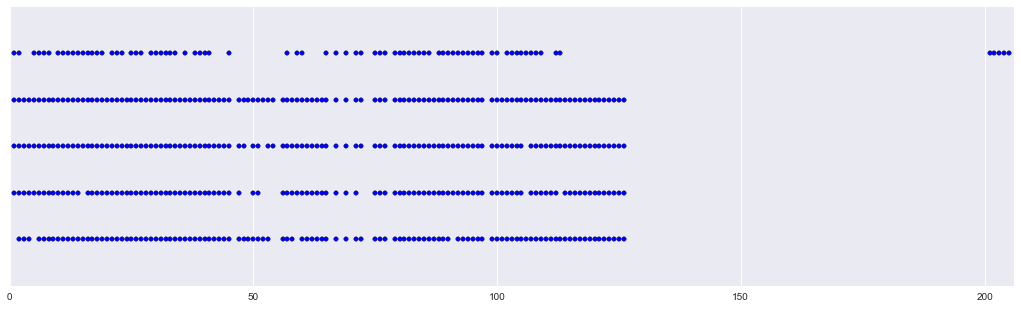

In [9]:
# plt.figure(figsize=(18,5))
f, ax, = plt.subplots(1, 1, sharey=True, figsize=(18,5))
print(ax)
for i, tissue in enumerate(np.unique(factors['source tissue'])):
    x = factors['subjectid'][np.where(factors['source tissue'] == tissue)[0]]
    y = np.ones_like(x) * (i + 1)
    ax.scatter(x.values, y)
plt.yticks([])
plt.xlim(0, 206)
plt.show()

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
for tissue in np.unique(factors['source tissue']):
    print('Training with {}'.format(tissue))
    condition = factors['source tissue'] == tissue
    clf = LogisticRegression(dual=True)
    X_train, X_test, y_train, y_test = train_test_split(betas[condition], factors[condition]['ad.disease.status'], 
                                                       test_size=0.1)
    %time clf.fit(X_train, y_train)
    print('Accuracy: {}'.format(clf.score(X_test, y_test)))

Training with cerebellum
CPU times: user 57.1 s, sys: 664 ms, total: 57.8 s
Wall time: 58.7 s
Accuracy: 0.333333333333
Training with entorhinal cortex
CPU times: user 1min 4s, sys: 865 ms, total: 1min 5s
Wall time: 1min 8s
Accuracy: 0.363636363636
Training with frontal cortex
CPU times: user 54.7 s, sys: 609 ms, total: 55.3 s
Wall time: 56 s
Accuracy: 0.333333333333
Training with superior temporal gyrus
CPU times: user 55.5 s, sys: 550 ms, total: 56.1 s
Wall time: 56.5 s
Accuracy: 0.25
Training with whole blood
CPU times: user 40.9 s, sys: 510 ms, total: 41.4 s
Wall time: 42.3 s
Accuracy: 0.125
